# Vanilla Autoencoder
Build a simple "vanilla" autoencoder that can be used on the fashion-mnist data. "Hands-On Machine Learning", by Aurelien Geron, provides much of the code

In [17]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import tensorboard

print('TensorFlow version: ', tf.__version__)
print('Keras version: ', keras.__version__)
print('Tensorboard version:', tensorboard.__version__)

%matplotlib inline

TensorFlow version:  2.0.0
Keras version:  2.2.4-tf
Tensorboard version: 2.0.0


Left align tables:

In [2]:
%%html
<style>
table {float:left}
</style>

## 1.0 Data Exploration
Let's look at the fashion-MNIST data set, and make sure we understand it.

In [3]:
# load fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_all, y_train_all), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# check the shape of the data sets
print('X_train_full shape:', X_train_all.shape)
print('y_train_full shape:', y_train_all.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
# print off some y labels to check if it's already shuffled
y_train_all[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
# to access, say, the first sample, you can index into the array as follows
# show the shape of the first sample
np.shape(X_train_all[0,:,:])

(28, 28)

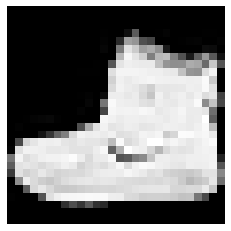

In [7]:
# show the sample
sample_to_display = 0

fig, axes = plt.subplots(1, 1)
axes.imshow(np.reshape(X_train_all[sample_to_display,:,:],[28,28]), cmap='Greys_r')
axes.axis('off')
plt.show()

Each training and test example is assigned one of the following labels (from https://github.com/zalandoresearch/fashion-mnist):


| Label | Description |
| :--- | :--- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

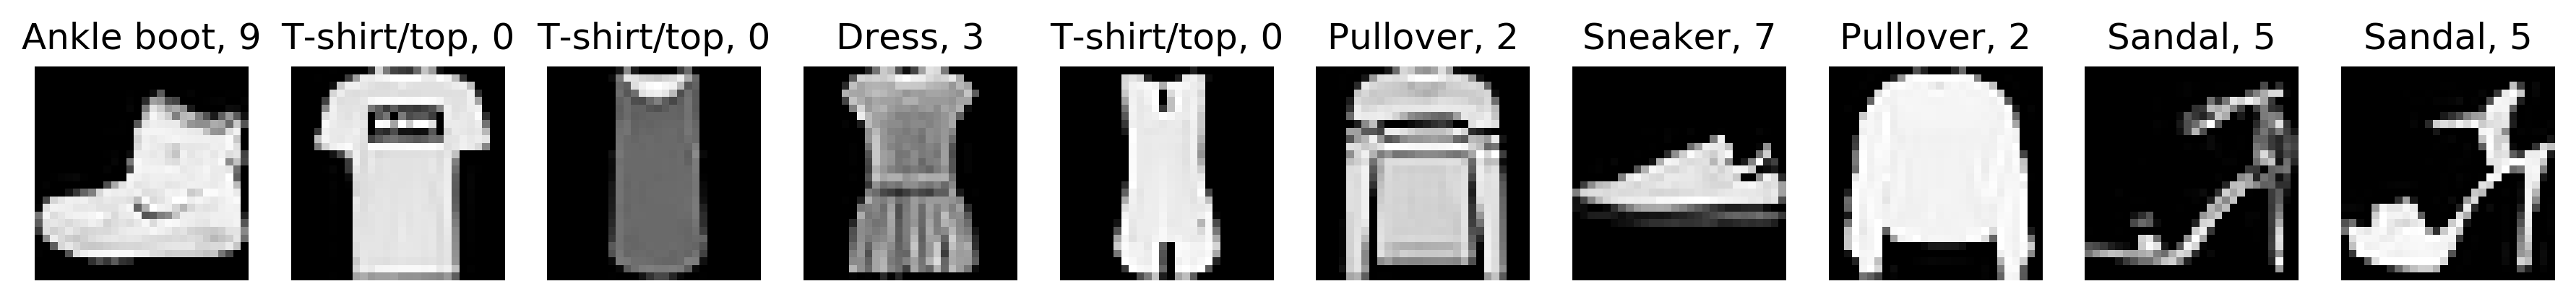

In [9]:
# lets visualize some of these
    # k - number of samples
    # w - width in pixels
    # h - height in pixels

k, w, h = X_train_all.shape

# Plot a random sample
fig, axes = plt.subplots(1, 10,figsize=(15,2.3),dpi=300)
# fig.suptitle('Digits for Sample %i' %num, size=15, x=0.2)

for i in range(0, 10):
    axes[i].imshow(np.reshape(X_train_all[i,:,:],[28,28]), cmap='Greys_r')
    axes[i].axis('off')
    axes[i].set_title(str(class_names[y_train_all[i]])+', '+str(y_train_all[i]))

## 2.0 Prepare Data

In [10]:
# need to scale the data between 0 and 1
# find out what the min/max values are
print('Max: ',X_train_all.max())
print('Min: ',X_train_all.min())

Max:  255
Min:  0


In [11]:
# split the data between train and validation sets, and scale

X_valid, X_train = X_train_all[:5000] / 255.0, X_train_all[5000:] / 255.0
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

# also scale the X_test
X_test = X_test / 255.0

print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_valid.shape)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_valid shape: (5000, 28, 28)
y_valid shape: (5000,)
X_train shape: (55000, 28, 28)
y_train shape: (55000,)


## 3.0 Simple Sequential Model

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
# create a name for the model so that we can track it in tensorboard
log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_ae_vanilla"

# create tensorboard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0,
                                                      update_freq='epoch',profile_batch=0)

In [29]:
history = model.fit(X_train, y_train, 
                    epochs=30,
                    verbose=1,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[tensorboard_callback])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.2214 - accuracy: 0.9206 - val_loss: 0.2904 - val_accuracy: 0.8972
Epoch 2/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.2183 - accuracy: 0.9208 - val_loss: 0.3026 - val_accuracy: 0.8928
Epoch 3/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.2139 - accuracy: 0.9239 - val_loss: 0.2975 - val_accuracy: 0.8938
Epoch 4/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.2098 - accuracy: 0.9246 - val_loss: 0.3095 - val_accuracy: 0.8940
Epoch 5/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.2068 - accuracy: 0.9253 - val_loss: 0.2986 - val_accuracy: 0.8932
Epoch 6/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.2030 - accuracy: 0.9279 - val_loss: 0.3223 - val_accuracy: 0.8906
Epoch 7/30
55000/55000 [==============================] -

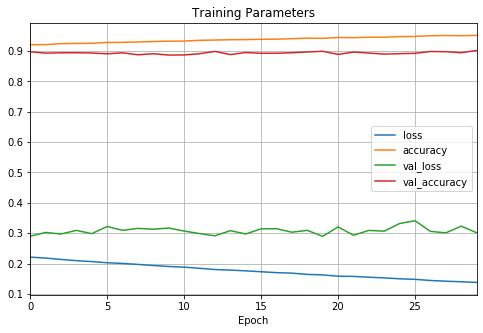

In [30]:
# put history of training into a dataframe
df_hist = pd.DataFrame(history.history)

df_hist.plot(figsize=(8, 5)) # plot
plt.grid(True) # apply grid
plt.title('Training Parameters') # plot title
plt.xlabel('Epoch') # x-axis label
plt.show()

In [32]:
# evaluate the model
model.evaluate(X_test, y_test, verbose=0)

[0.3329021214157343, 0.8941]